In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4367,ham,1 I don't have her number and 2 its gonna be a...,NaN,NaN,NaN
4348,ham,ÌÏ bot notes oredi... Cos i juz rem i got...,NaN,NaN,NaN
3908,ham,Serious? What like proper tongued her,NaN,NaN,NaN
38,ham,Anything lor... U decide...,NaN,NaN,NaN
4897,ham,Oh for fuck's sake she's in like tallahassee,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [6]:
df.sample(5)

,v1,v2
5217,ham,Well thats nice. Too bad i cant eat it
5370,spam,dating:i have had two of these. Only started a...
2372,ham,Watching tv lor... Y she so funny we bluff her...
1750,ham,Got it..mail panren paru..
4104,ham,Jus finish my lunch on my way home lor... I to...


In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
#Rename the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [9]:
# df.sample()
#Checking for the duplicate value in dataset
df.duplicated().sum()

403

In [10]:
#Remove the duplicate value from the dataset
df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

In [12]:
# changing the value of ham and spam with integer value
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
# df.sample(5)
df.shape

(5169, 2)

## EDA

In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [16]:
#Show the representation in percentage using graph 
import matplotlib.pyplot as plt

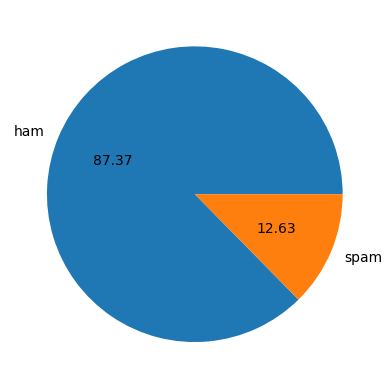

In [17]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [18]:
#install the NLTK library
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import nltk 

In [20]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Manish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
#Creating a new column that stores the value of number of words in text
df['num_character'] = df['text'].apply(len)

In [22]:
#Creating a new column that stores a number of words in text
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
# creating a new column to store the value of number of sentences in text
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
df[['num_character','num_words','num_sentence']].describe()
# df.columns

,num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# Describe of ham sms in data
df[df['target']==0][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# Describe of spam sms in data
df[df['target']==1][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_character', ylabel='Count'>

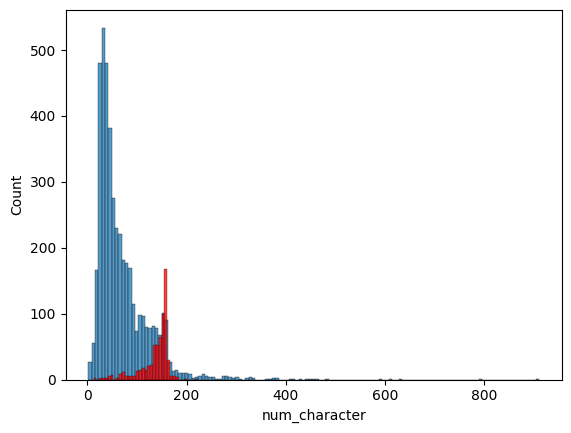

In [27]:
#Plotting the num_character in ham sms with help if histogram 
sns.histplot(df[df['target']==0]['num_character'])
#Plotting the num_character in spam sms with help if histogram 
sns.histplot(df[df['target']==1]['num_character'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

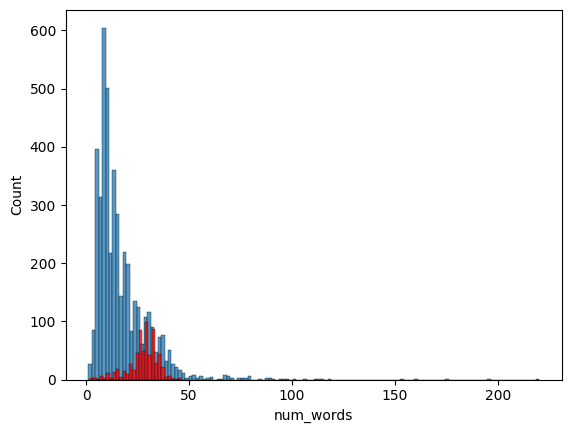

In [28]:
sns.histplot(df[df['target']==0]['num_words']) 
sns.histplot(df[df['target']==1]['num_words'], color='red')
# plt.figure(figsize=(11,6))

## Data Preprocessing

In [29]:
from nltk.corpus import stopwords
import string

In [35]:
# Connvert the string into lowercase
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
   
    #for removing special chracter 
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            

    # for removing the punctuation and stopwords
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    #for stemming
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
        
    

In [36]:
transform_text("Hellooooo Howww Are %% you Himasnhu hello dancing hello")

'hellooooo howww himasnhu hello danc hello'

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Dancing')

'danc'

In [41]:
# Adding the transformed data into new column 
df['transformed'] = df['text'].apply(transform_text)
df.head()

,target,text,num_character,num_words,num_sentence,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
!pip install --user wordcloud

In [32]:
import sys
!{sys.executable} -m pip install wordcloud --user

In [33]:
from wordcloud import WordCloud
print("WordCloud imported successfully!")

WordCloud imported successfully!


In [48]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='White')

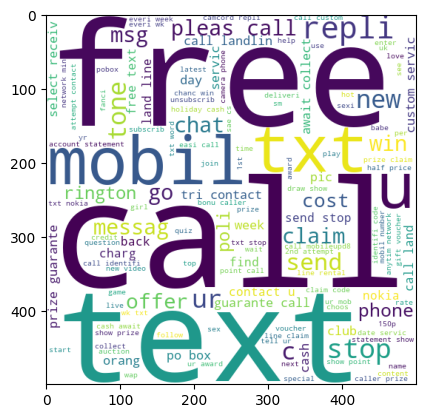

In [49]:
spam_wc = wc.generate(df[df['target']==1]['transformed'].str.cat(sep=''))
plt.imshow(spam_wc)

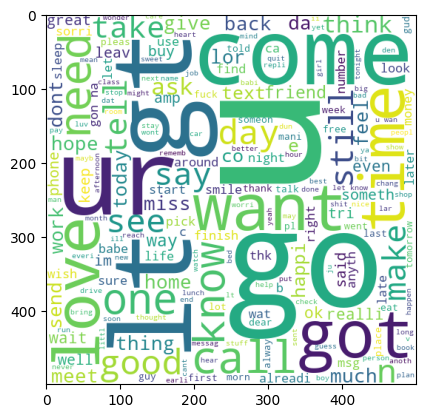

In [52]:
ham_wc = wc.generate(df[df['target']==0]['transformed'].str.cat(sep=''))
plt.imshow(ham_wc)

In [59]:
#Find the 30 most used words in spam 
spam_corpus = []
for msg in df[df['target']==1]['transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [60]:
len(spam_corpus)

9939

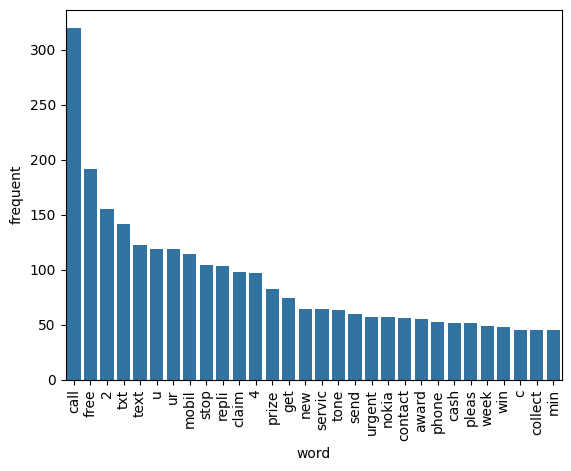

In [81]:
from collections import Counter
import matplotlib.pyplot as plt
word_counts = Counter(spam_corpus).most_common(30)
df_word = pd.DataFrame(word_counts, columns=['word','frequent'])
sns.barplot(x='word', y='frequent', data=df_word)
plt.xticks(rotation='vertical')
plt.show()

In [90]:
ham_corpus = []
for msg in df[df['target']==0]['transformed'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


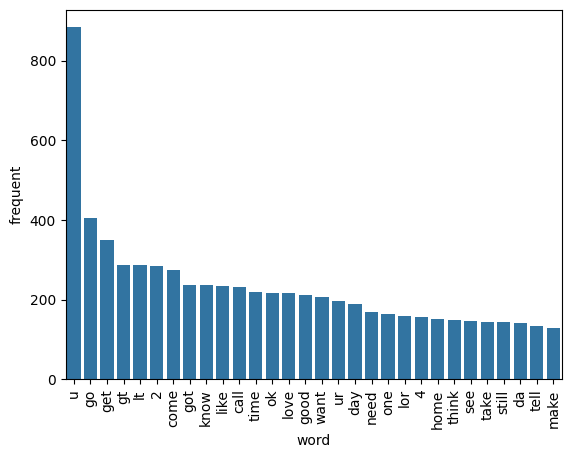

In [91]:
word_count = Counter(ham_corpus).most_common(30)
df_words = pd.DataFrame(word_count, columns=['word', 'frequent'])
sns.barplot(x='word', y='frequent', data=df_words)
plt.xticks(rotation='vertical')
plt.show()

## Modelling

In [130]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [131]:
# X = cv.fit_transform(df['transformed']).toarray()
# change value of X for Tfidf
X = tfidf.fit_transform(df['transformed']).toarray()
y = df['target'].values

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [133]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix 

In [134]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [135]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [136]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [137]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


## Creating pipeline

In [139]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('main.pkl','wb'))
pickle.dump(model, open('main.pkl', 'wb'))


NameError: name 'model' is not defined